In [1]:
import xfirst

Welcome to JupyROOT 6.28/04


### Load data data

In [2]:
features = xfirst.profile_functions.usp().parameter_names
target = 'Xfirst'

train, validation, test, normalization = xfirst.data.load_fits(
  'data',
  cut = xfirst.config.cuts.A1,
  drop = True,
  xfirst = True,
  norm = features,
  nshowers = 100000
)

### Train the gradient boosting regressor

In [3]:
regressor = xfirst.models.gradient_boosting_regressor().fit(
  train = (train[features], train[target]),
  validation = (validation[features], validation[target]),
)

[0]	validation_0-rmse:28.96337	validation_1-rmse:28.99524
[1]	validation_0-rmse:23.98463	validation_1-rmse:24.06493
[2]	validation_0-rmse:20.93331	validation_1-rmse:21.04637
[3]	validation_0-rmse:19.09617	validation_1-rmse:19.24268
[4]	validation_0-rmse:17.95627	validation_1-rmse:18.12009
[5]	validation_0-rmse:17.26806	validation_1-rmse:17.44678
[6]	validation_0-rmse:16.86235	validation_1-rmse:17.05133
[7]	validation_0-rmse:16.57789	validation_1-rmse:16.77800
[8]	validation_0-rmse:16.40776	validation_1-rmse:16.62297
[9]	validation_0-rmse:16.28168	validation_1-rmse:16.50246
[10]	validation_0-rmse:16.21131	validation_1-rmse:16.44228
[11]	validation_0-rmse:16.15816	validation_1-rmse:16.39528
[12]	validation_0-rmse:16.10733	validation_1-rmse:16.35099
[13]	validation_0-rmse:16.06984	validation_1-rmse:16.32326
[14]	validation_0-rmse:16.03984	validation_1-rmse:16.29941
[15]	validation_0-rmse:16.01760	validation_1-rmse:16.28729
[16]	validation_0-rmse:15.99514	validation_1-rmse:16.27635
[17]	va

### Validation curve

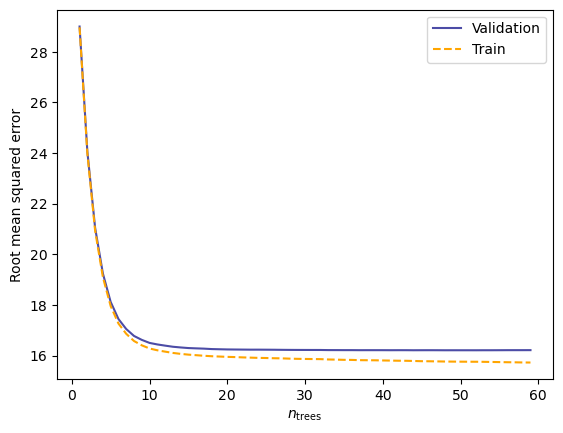

In [4]:
fig = regressor.draw()

### Compute predictions

In [5]:
results = regressor.test(test[features], test[target])
results['lgE'] = test['lgE']
results

predictions      target  residuals        lgE
particle id                                                   
p        0         26.123943   21.829575   4.294369  18.407814
         1        223.537384  272.238708 -48.701324  17.403774
         2         75.793564  112.972229 -37.178665  18.852810
         3         52.933323   61.754780  -8.821457  19.517765
         4         12.213303    8.127032   4.086270  19.965719
...                      ...         ...        ...        ...
Fe       113155     5.530912    2.983281   2.547631  19.333250
         113156     7.500509    9.596168  -2.095659  19.417343
         113157     9.497227    7.408271   2.088955  18.687757
         113158     6.315458    2.866934   3.448524  17.818190
         113159    18.440224   30.477446 -12.037222  17.192457

[500000 rows x 4 columns]

### Draw predictions

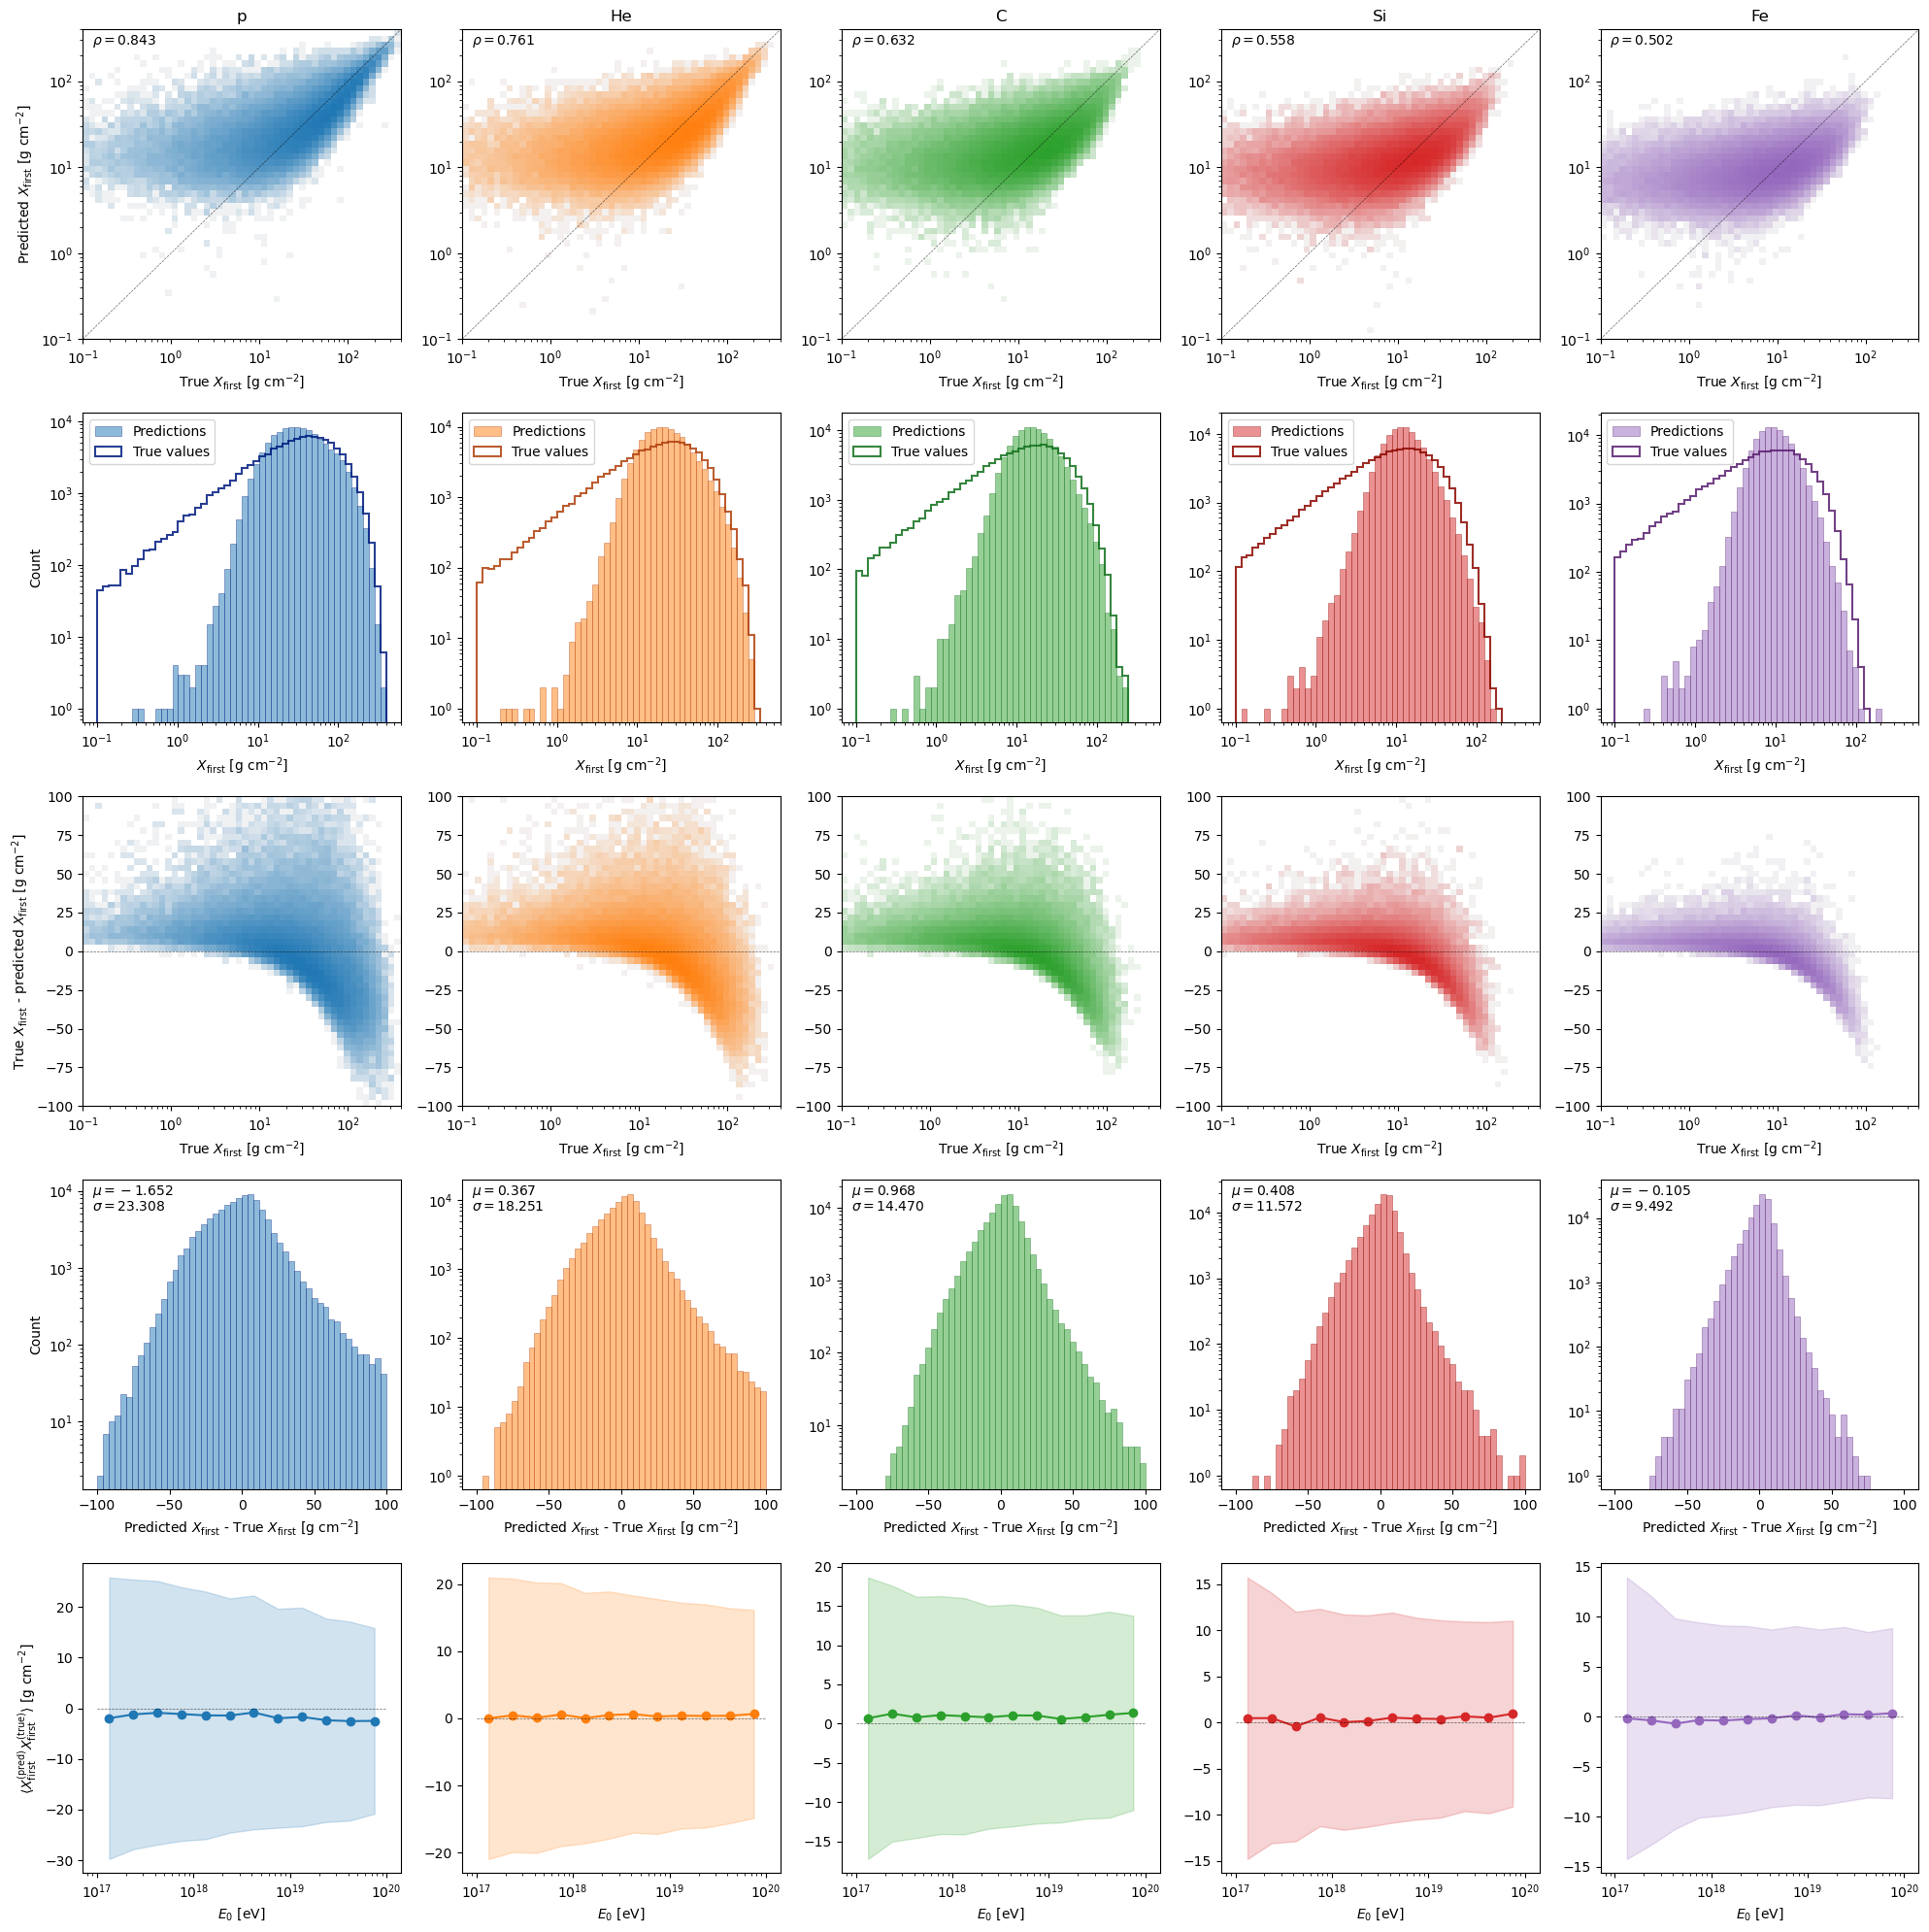

In [6]:
fig = xfirst.viz.draw_predictions(results)